# Visualización de los datos
He exportado las coordenadas de todas las camaras/sensores a dos csv. Los importo en un dataframe para ver como estan puestos espacialmente.

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [55]:
camaras = pd.read_csv("CoordCamaras.csv", sep=",")

In [56]:
sensores = pd.read_csv("CoordSensores.csv", sep=",")

In [57]:
sensores['tipo'] = 0
camaras['tipo'] = 1

In [58]:
camaras.columns = ['id', 'longitud', 'latitud', 'tipo']

In [59]:
todo = pd.concat([camaras, sensores], sort=False)

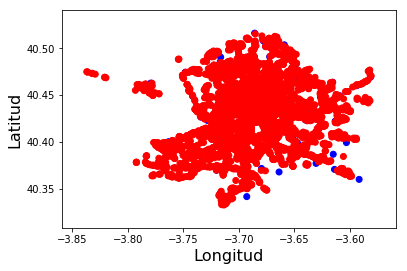

In [60]:
plt.scatter(todo['longitud'], todo['latitud'], c=todo['tipo'], cmap=cm_bright)
plt.xlabel("Longitud", fontsize=16)
plt.ylabel("Latitud", fontsize=16)
plt.show()

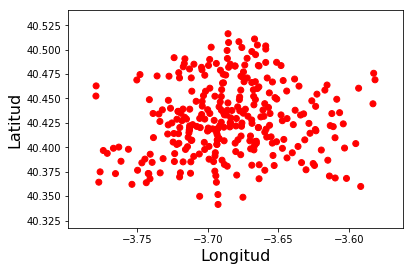

In [61]:
plt.scatter(camaras['longitud'], camaras['latitud'], c=camaras['tipo'], cmap=cm_bright)
plt.xlabel("Longitud", fontsize=16)
plt.ylabel("Latitud", fontsize=16)
plt.show()

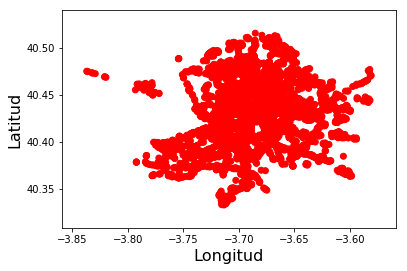

In [62]:
plt.scatter(sensores['longitud'], sensores['latitud'], c=sensores['tipo'], cmap=cm_bright)
plt.xlabel("Longitud", fontsize=16)
plt.ylabel("Latitud", fontsize=16)
plt.show()

# Entrenamiento del clustering

In [63]:
X_camaras = camaras.drop(columns=['id','tipo']).values
X_sensores = sensores.drop(columns=['id','tipo']).values
X_todo = todo.drop(columns=['id','tipo']).values

In [64]:
num_cluster = 200
random_state = 42

In [65]:
kmeans = KMeans(n_clusters=num_cluster, random_state=random_state)

In [66]:
y_pred_camara = KMeans(n_clusters=num_cluster, random_state=random_state).fit_predict(X_camaras)
y_pred_sensor = KMeans(n_clusters=num_cluster, random_state=random_state).fit_predict(X_sensores)
y_pred_todo = KMeans(n_clusters=num_cluster, random_state=random_state).fit_predict(X_todo)

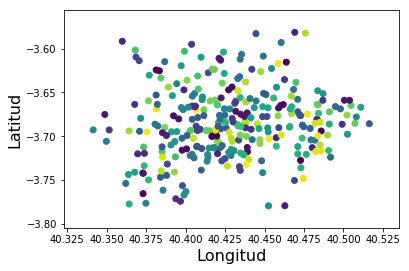

In [67]:
plt.scatter(X_camaras[:, 1], X_camaras[:, 0], c=y_pred_camara)
plt.xlabel("Longitud", fontsize=16)
plt.ylabel("Latitud", fontsize=16)
plt.show()

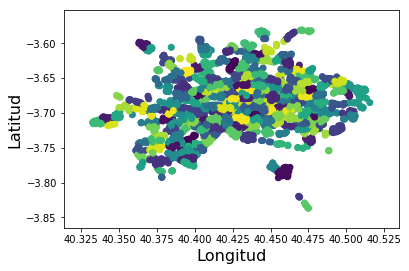

In [68]:
plt.scatter(X_sensores[:, 1], X_sensores[:, 0], c=y_pred_sensor)
plt.xlabel("Longitud", fontsize=16)
plt.ylabel("Latitud", fontsize=16)
plt.show()

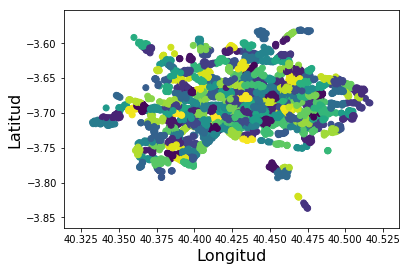

In [69]:
plt.scatter(X_todo[:, 1], X_todo[:, 0], c=y_pred_todo)
plt.xlabel("Longitud", fontsize=16)
plt.ylabel("Latitud", fontsize=16)
plt.show()

In [74]:
kmeans.fit(X=X_camaras)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [75]:
kmeans.predict(X=X_camaras)

array([ 55, 190, 153,  38,  38, 183,  50,  96,  96,  96,  96,  94,  63,
       161,   1,   1,   1,   1,  50, 176, 185,  55, 153, 190,  50,  38,
        38, 176,  96, 161, 147, 147, 111, 111,  62,   9,  62,   9,  76,
         7,  76, 160,  38,  59, 199, 157,  27,  27,  27,  68,  59,  59,
       159, 145, 145,  88,  40,  88,  68, 128, 177, 139, 177,  11,  34,
       128, 128,  11,  11,  68, 173,  11,  34,  55,  74, 118,  52,   8,
         8, 164,  43,  43, 118, 180, 172, 193,  26,  26,  52, 107,  52,
       113, 122, 186,  60, 127, 127,  42, 103, 115, 163, 163,  19, 188,
       132, 194, 103,  29,  29, 139, 139, 158,  10,  71,  46,  10, 158,
         4,  81,  23,   2, 192,  41,  92, 171, 189, 189,  81, 136, 150,
       114,  60,  60, 123, 124, 121,  69, 105, 197, 151,  12,  57,  30,
       178, 186, 117, 165, 123,  65,  93, 135,  63, 101, 126, 126, 126,
        84,  21, 181,  39,  48,  95, 182,  39,  15, 101, 101,  48,  67,
       198,  94,  80,  94,  85,   5, 130,  73,  97,  87,  28,  6

In [81]:
kmeans.cluster_centers_


array([[-3.61546858, 40.4637944 ],
       [-3.69905617, 40.41824284],
       [-3.72759054, 40.47283102],
       [-3.62484594, 40.38239928],
       [-3.69402554, 40.4859047 ],
       [-3.76556744, 40.37305566],
       [-3.64550972, 40.42834231],
       [-3.71519149, 40.3992184 ],
       [-3.66549468, 40.46035256],
       [-3.67848113, 40.394025  ],
       [-3.71526965, 40.43912507],
       [-3.67432119, 40.43577744],
       [-3.6589559 , 40.5022383 ],
       [-3.67515524, 40.34884445],
       [-3.61213582, 40.4216886 ],
       [-3.77930603, 40.46290593],
       [-3.74212855, 40.37303431],
       [-3.65624784, 40.42253651],
       [-3.69757016, 40.38660229],
       [-3.70166784, 40.45742075],
       [-3.58143004, 40.46916078],
       [-3.71992556, 40.42027268],
       [-3.59159438, 40.35990039],
       [-3.713029  , 40.48024499],
       [-3.647133  , 40.39894796],
       [-3.71978995, 40.37177909],
       [-3.68075224, 40.48326961],
       [-3.66596034, 40.40556718],
       [-3.77280923,

Guardo el modelo calculado

In [21]:
import pickle
s = pickle.dumps(kmeans)
kmeans2 = pickle.loads(s)
kmeans2.predict(X=X_todo)

array([157,  95,  95, ...,  45,  45,  45], dtype=int32)

In [22]:
pickle_out = open("kmeans.joblib","wb")
pickle.dump(kmeans, pickle_out)
pickle_out.close()

## Predicción
Para predecir a que cluster pertenece un punto basta con hacer esto:

In [23]:
import pickle
import numpy as np

In [24]:
#Abrir el fichero con la descripcion del modelo

file = open("kmeans.joblib", 'rb')

# dump information to that file
modelo = pickle.load(file)

# close the file
file.close()


In [25]:
coordenadas = np.array([-3.89051645, 40.42566934])

In [26]:
modelo.predict(X=coordenadas.reshape(1, -1))[0]

30

## Contaminación

Con la contaminación (y con el tiempo) tengo un planteamineto distinto. Como hay menos sensores que clusters, hago la operación contraria, generando una clusterización para cada sensor (24 sensores, 24 clusters) y aplico el modelo con los centros de los clusters calculados anteriormente.

In [47]:
contaminacion = pd.read_csv("contaminacion.csv", sep=",")

In [48]:
X_contaminacion = contaminacion.drop(columns=['id']).values

In [49]:
num_cluster_cont = 24
random_state = 42

In [50]:
kmeans_contaminacion = KMeans(n_clusters=num_cluster_cont, random_state=random_state)

In [51]:
y_pred_contaminacion = kmeans_contaminacion.fit(X_contaminacion)

In [86]:
X_clusters = kmeans.cluster_centers_.tolist()

In [87]:
kmeans_contaminacion.predict(X=X_clusters)

array([15, 22,  5,  4, 16, 20,  2,  7, 19,  9, 18, 19,  1, 12,  2,  0, 20,
       11,  9, 18, 21,  3,  4,  5, 11,  7, 10, 23,  0, 13, 16,  1, 17, 12,
       14, 15,  4,  2,  9,  0, 14,  5, 10, 19,  4, 20, 18, 11,  3, 21, 22,
       17, 10,  7,  0, 14,  2, 16, 20, 23, 10,  0,  9,  3,  7,  1, 17, 18,
       14,  5,  4, 18,  1, 20,  2, 15,  9, 15, 21,  2, 20,  5, 11,  2,  3,
       20, 12, 20, 14, 17, 12,  9,  0, 16,  3,  0,  3,  0, 15, 11,  9,  3,
        7, 13,  2, 16,  1, 19,  4, 11,  7,  9, 17, 19,  5, 13,  4,  1, 19,
        2, 15, 16, 19,  5,  5, 20,  3, 10, 14,  2, 20,  7, 18, 19,  1,  5,
        5,  4, 20, 13, 11,  4,  7,  7, 15, 14, 11,  9,  1, 17,  1, 16,  1,
       22, 11, 11, 17, 23, 13, 11,  9, 22, 11, 18, 19, 16, 20, 17,  2, 19,
       12, 16, 10, 19,  6,  2,  3, 13,  5, 20, 13,  0, 18, 22,  2, 22, 16,
        7, 10,  5, 22, 17,  5, 10, 18, 15,  9,  5,  0, 23], dtype=int32)

## Tiempo
Igual que con la contaminación.